In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [4]:
ROOT_DIR = "/content/drive/MyDrive/deeplearning/Braintumor dataset"

num_of_imgs = {}

for dir in os.listdir(ROOT_DIR):
  num_of_imgs[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

num_of_imgs.items()

dict_items([('glioma tumor', 8), ('.ipynb_checkpoints', 0), ('healthy', 10)])

In [5]:
# split the dataset
def dataFolder(p,split):
  dataset_path = os.path.join("..", p)
  if not os.path.exists(dataset_path):
    os.mkdir(dataset_path)
    for dir in os.listdir(ROOT_DIR):
      os.makedirs(os.path.join(dataset_path,dir))
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size=(math.floor(split*num_of_imgs[dir])-5),
                                  replace=False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join(dataset_path,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{p} has already been created")

In [7]:
dataFolder("train",0.7)

train has already been created


In [10]:
dataFolder("val",0.5)

val has already been created


In [11]:
dataFolder("test",0.5)

test has already been created


DEEP Learning Model



In [12]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
#CNN Model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation="sigmoid"))

model.summary()


In [14]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [15]:
#preparing data generator

def preprocessingImages(path):
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224),batch_size=16, class_mode="binary")

  return image

In [16]:
path = "/content/drive/MyDrive/deeplearning/train"
train_data = preprocessingImages(path)

Found 2030 images belonging to 2 classes.


In [17]:
def preprocessingImages1(path):
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224),batch_size=16, class_mode="binary")

  return image

In [18]:
path = "/content/drive/MyDrive/deeplearning/test"
test_data = preprocessingImages1(path)

Found 433 images belonging to 2 classes.


In [19]:
path = "/content/drive/MyDrive/deeplearning/val"
val_data = preprocessingImages1(path)

Found 433 images belonging to 2 classes.


In [20]:
# early stopping and model cehckpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience=6, verbose=1,mode='auto')

#model check point
mc =ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose=1, save_best_only=True, mode='auto')

cd =[es,mc]

In [ ]:
#Model Training
hs = model.fit(train_data,
               steps_per_epoch=8,
               epochs=30,
               verbose=1,
               validation_data=val_data,
               validation_steps=16,
               callbacks=cd)


In [24]:
#Model Graphical Interpretation

h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

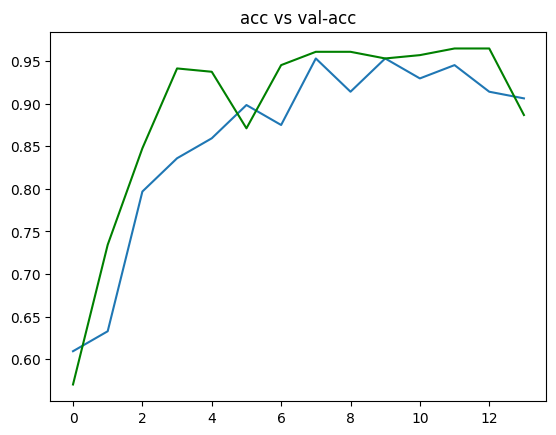

In [25]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c ='green')

plt.title("acc vs val-acc")
plt.show()

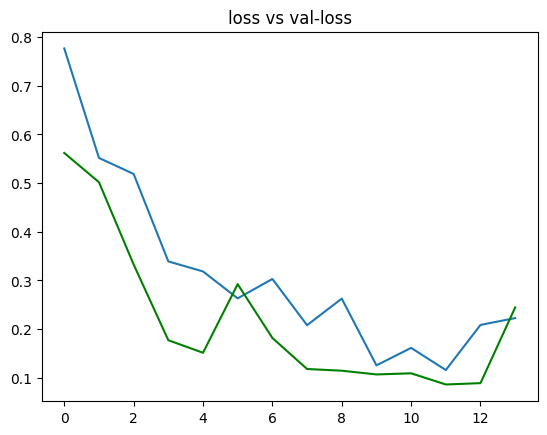

In [26]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c ='green')

plt.title("loss vs val-loss")
plt.show()

In [31]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

model = load_model("bestmodel.h5")

In [30]:
acc = model.evaluate(test_data)[1]
print(f"The accuracy of the model is {acc*100} %")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 185s 7s/step - accuracy: 0.9029 - loss: 0.2003
The accuracy of the model is 91.2240207195282 %


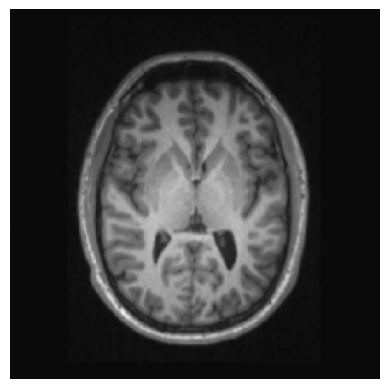

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The person does not have a brain Tumor


In [46]:
path="/content/drive/MyDrive/deeplearning/Braintumor dataset/healthy/Tr-no_0267.jpg"
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.axis("off")
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr,axis=0)
pred = (model.predict(input_arr)>0.5).astype("int")[0][0]
if pred == 0:
  print("The person has a brain Tumor")
else:
  print("The person does not have a brain Tumor")

In [43]:
train_data.class_indices

{'glioma tumor': 0, 'healthy': 1}